# Problem Statement

*  We need to predict  the chance of admission based on he student various scores .

--> __Feature or independent Variables 
- GRE Score
- TOEFL Score
- SOP 
- LOR
- CGPA
- Research

-->__Label/Target
- Chance of Admission

In [4]:
#Lets Start with importing necessary libraries.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
data.shape

(500, 9)

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
#Fill the null values.
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [12]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
del data['Serial No.']
# data=data.drop(columns=['Serial No.'])  --> Other way to delete a column
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


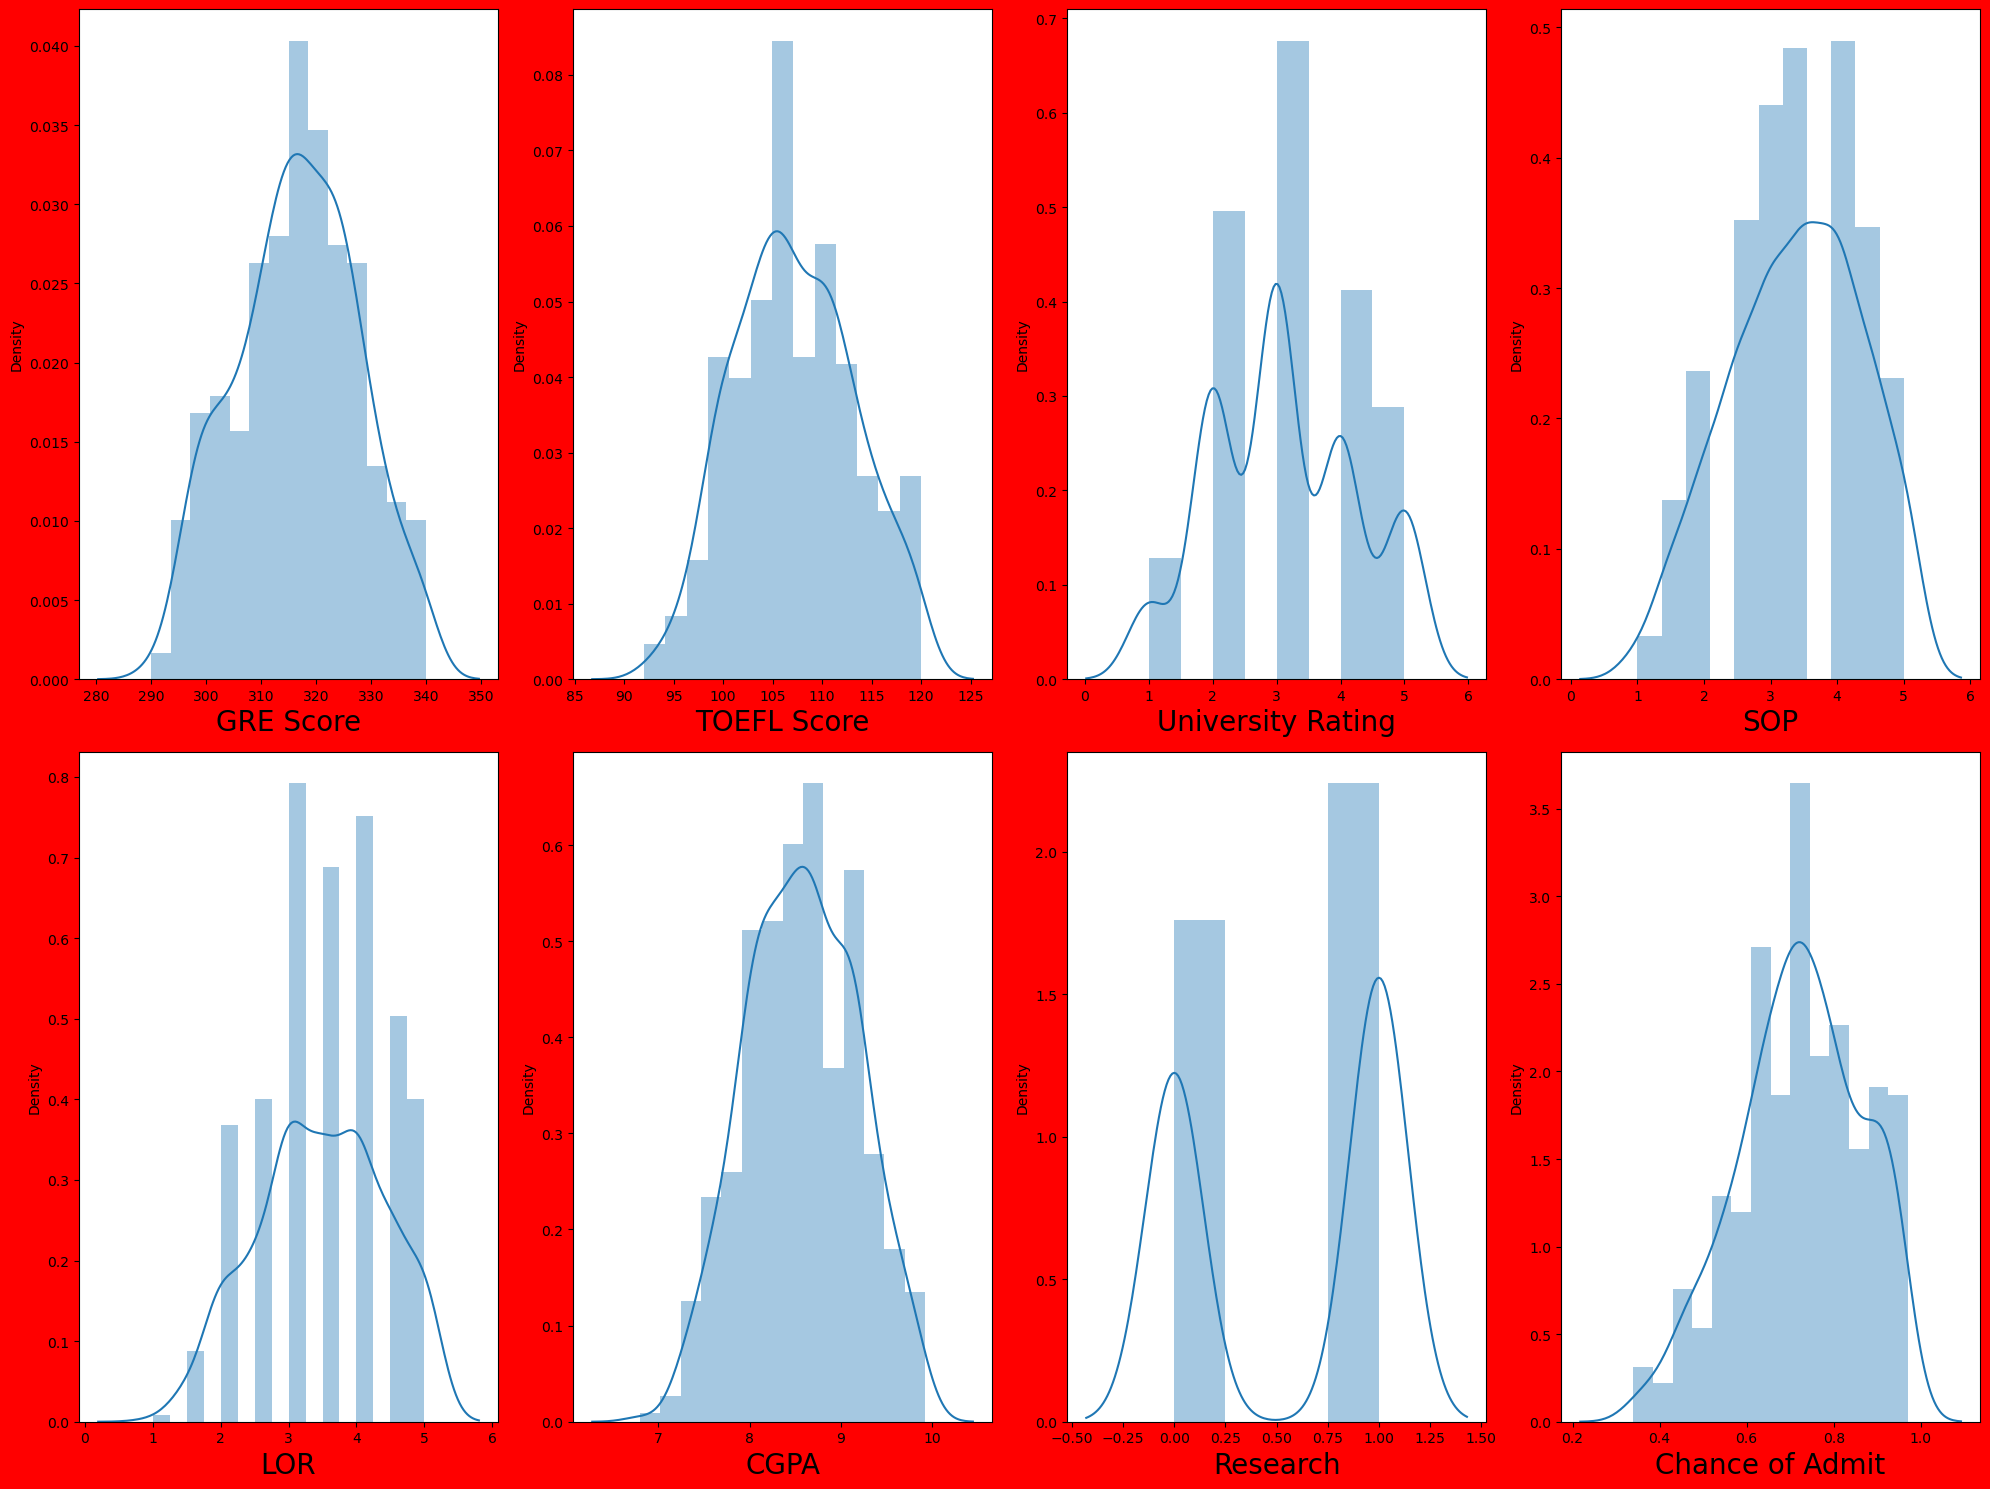

In [16]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

The data distribution looks decent, and there does not seem to be any skewness.  

Great! Let's go ahead and observe the relationship between the independent and dependent variables.

In [20]:
#First we need to sepatrate features and labels so in y we are keeping label and in x we are dropping 'Chance of Admit'

#Divide dataset into Features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

In [22]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [24]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


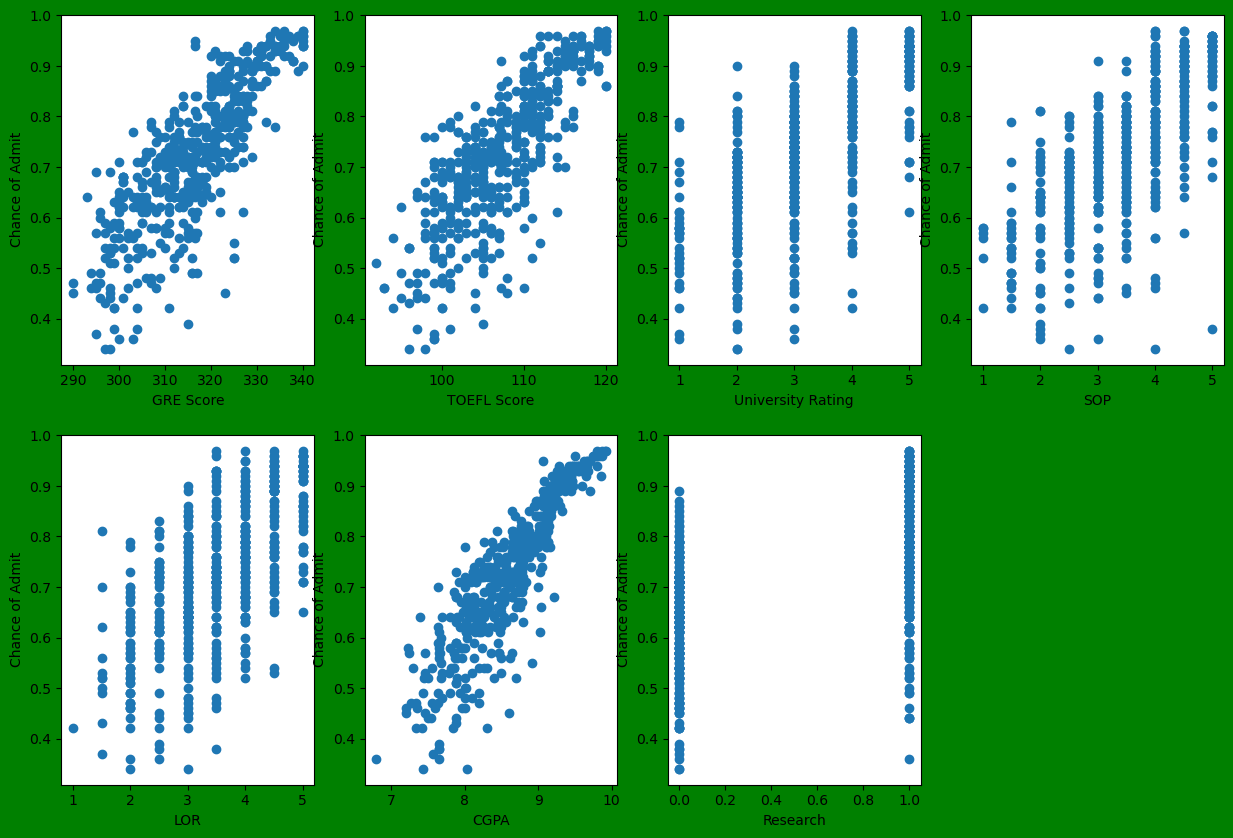

In [26]:
#Visualizing  relationship

plt.figure(figsize=(15,10),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber <=8:
        plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber +=1
plt.show()

We only need to check whether there is a relationship or not, not to worry if relationship is weak

Great, the relationship between the dependent variable and independent varible look fairly linear. Thus, our linearly assumption is satisfied.

# Standard Scaler

We are going to make our columns **unitless**, and then we will standardize the data.  
This process is called **standard scaling**.

Suppose we have features with different units.  
We need to remove these units and bring the data to the same scale.

---

## Example  
I have **four friends**, and all of them are equally knowledgeable.  
However, one friend is very close to me.  
If I only listen to that one friend and ignore the others, I am being **biased**.  

**Bias** → When we give preference to only one source and ignore others.

Similarly, in machine learning, we need to give **equal importance** to all features.  
To achieve this, we bring the numbers to a **similar scale**.  
This is why we apply a **Standard Scaler**.

---

**Note:** We apply the Standard Scaler **only to the features** (not the target variable).

---

## `fit_transform()`
- Uses a formula (**Z-score standardization**) to transform the data into a standardized form.
- This means it converts values into new numbers based on the **Z-distribution formula**:

\$[
Z = \frac{X - \mu}{\sigma}
\$]

Where:  
- \$( X \$) = Original value  
- \$( \mu \$) = Mean of the feature  
- \$( \sigma \$) = Standard deviation of the feature


In [30]:
#Data Scaling Fomula z =(x-mean)/std 
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

# Train-Test Split

The client says that they have only a limited amount of data (around 1–2 million records). Whatever data they have, they are giving to us. So, whatever model we build, we have to work with exactly this dataset. There is nothing extra available. Basically, the client will provide everything, and we need to build a model using only that.  

To build a model, as we did in the earlier example, we first built a Linear Regression model and then evaluated it using some metrics to check how good the model is. Remember: we first **train** the model, and then we check its performance or confidence.  

So, in practice, we need to:  

1. Build the model using the given dataset.
2. Train it on the dataset.
3. Test it to evaluate its performance.  

We cannot just build a model and hand it over to the client. (Imagine the client laughing!) They will ask questions like:  

- Did you test it?  
- Is it working properly?  
- What is the model’s performance?  
- What is the accuracy or confidence?  
- What is the $R^2$ score?  

We need a way to answer these questions. We do this by **evaluating the model's accuracy** and performance using a train-test split.  

---

## Example: Academic Analogy

Suppose you are an engineering student and you study throughout the year. At the end of the year, the college wants to test you. How will the professor evaluate you?  

- They give you a **test** (some questions).  
- Based on your answers, they calculate your performance as a percentage.  

Here:  
- Your **syllabus** is your dataset.  
- You **study the syllabus** = you **train on the dataset**.  
- The **test questions** = **test data**.  

### Key Points

- **Training**: Learning from the given dataset (questions + answers).  
- **Testing**: Evaluating what you learned using new data (questions only, answers hidden).  

So, to evaluate a model, we need to split the dataset into:

- **Training set** – for learning  
- **Test set** – for checking performance  

This is why we use `train_test_split` in Python with `sklearn.model_selection`.  

---

### Academic Analogy for Training and Testing

- During **training**, we provide questions and answers. You learn from both.  
- During **testing**, we provide only questions. You predict answers without seeing them.  
- The model’s predictions are then **compared to the hidden correct answers** (Actual vs Predicted).  

This is exactly the same concept as supervised machine learning:  

- Training data = for learning  
- Test data = for evaluation  

---

![tt.png](tt.png)


# Split the data into training and testing sets  
The model will be built on the **training data** and tested on the **test data**.

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=127855741)  # random_state is equivalent to seed() function from NumPy
y_train.head()
#Formula is = x_train,x_test,y_train,y_test = train_test_split(standard_scaler,labels,test_size,random_state)

431    0.73
289    0.79
70     0.94
360    0.85
41     0.49
Name: Chance of Admit, dtype: float64

# Model Instantiation and Training

In [37]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [39]:
#Predict the chance of admission give feature
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [41]:
#Since we vahe already fit the scaler . you can tranform the data .
print("Chance of Admission is : ",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is :  [0.82722916]


In [43]:
scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])

array([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])

When we are learning, our model is learning. How does it learn? It learns from **scaled data**.  

Basically, we convert our data to a scaled form. When we need to scale new data, we only use `scaler.transform()`.

# You can save the model and later you can use it for prediction

In [53]:
#Sac=ving the model to the local file system 
pickle.dump(regression,open('Debu_file','wb'))   # 'wb' means write binary

#They Save in bit wise 

In [55]:
# How to open Model

import pickle
lin_model=pickle.load(open('Debu_file','rb'))    # 'rb' mean read binary

In [57]:
lin_model

LinearRegression()

In [59]:
a=lin_model.predict([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])
print(a)

[0.82722916]


# Prediction using the saved model.

In [62]:
#Prediction using the saved model.

loaded_model=pickle.load(open('Suarv_file','rb'))
a=loaded_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))
a

array([0.82722916])

In [64]:
#Lets try in new window with only pickle model

scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])

array([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])

# Summary of What We Did

- We observed the data and identified any **NaN values**.  
- Checked the **data visualization**.  
- Examined the **relationships** between features.  
- Found that the relationships were good and the data was well-distributed.  
- **Standardized the data** using a Standard Scaler.  
- Split the dataset into **training and testing sets**.  
- **Trained the model** using `fit()` by passing `(X_train, y_train)`.  
- Made **predictions** on the test data.  
- **Saved the model** using `pickle`.  
- Tested the saved model by **loading it with pickle**.


# Now its time to check how good in our model.

Lets check how well model fits on train data.

In [68]:
#Adjusted R2
regression.score(x_train,y_train)

#Training Score 
# So that is how i am going to check how good my model understood the training data.

0.8133859783776154

In [70]:
#How Well my model will understand testing data.
# Lets check how well model fits the test data
regression.score(x_test,y_test)

#Testing Score

0.8364713048475854

**Q:** Why is the test score usually lower than the training score?  

**A:** The training score is usually higher because the model has already seen the training data.  
It “remembers” patterns from the training set, so it performs very well on it.  

On the other hand, the test data is **unseen** by the model.  
Since the model has not been exposed to the test data, the performance (test score) is usually lower than the training score.

# Lets Plot and Visualize

Now I wanted to test it, i am going to pass only x_test to regression model and it is going to predict and I also have actual label then I will compare predicted data to actual data. Whatever the result am going to get its my model confidence / how well my model will perform.

In [74]:
y_pred =(regression.predict(x_test))
y_pred

array([0.68684934, 0.47360976, 0.69649657, 0.4870096 , 0.67019582,
       0.501734  , 0.81508441, 0.83990546, 0.74236212, 0.78839599,
       0.7172982 , 0.76615348, 0.62431795, 0.64910356, 0.71868321,
       0.67298911, 0.83152472, 0.55942307, 0.71688681, 0.95593049,
       0.69345768, 0.62048356, 0.63248203, 0.71910217, 0.58053558,
       0.65828842, 0.42197674, 0.59732207, 0.63702849, 0.78744457,
       0.72033491, 0.62304747, 0.95595198, 0.65207263, 0.82952267,
       0.9301937 , 0.70265759, 0.54387599, 0.56502559, 0.75295423,
       0.86448735, 0.96286559, 0.58536461, 0.96109578, 0.72035267,
       0.9641533 , 0.70662077, 1.00002645, 0.71543514, 0.782229  ,
       0.91466534, 0.72865661, 0.60577183, 0.45600014, 0.61004492,
       0.74031626, 0.95761595, 0.54057511, 0.77883461, 0.87074719,
       0.63451543, 0.94619578, 0.65765596, 0.79662934, 0.71310339,
       0.80238956, 0.65046862, 0.53599474, 0.80394234, 0.6880485 ,
       0.78528238, 0.73187505, 0.86445912, 0.69263164, 0.91268

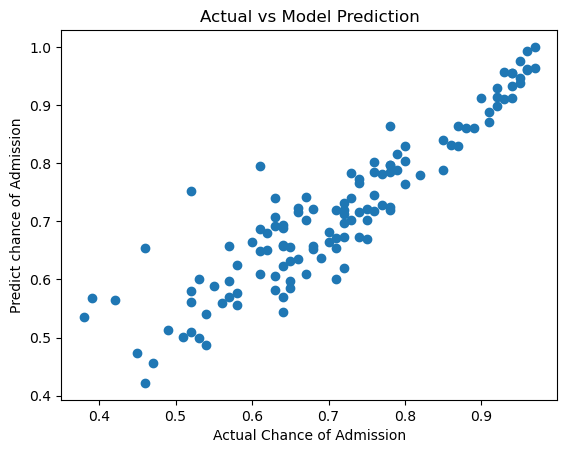

In [76]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

# Model Evaluation → Metrics

**Mean Absolute Error (MAE):**  
Represents the average error. You calculate the error for every data point and then take the average.  

\$[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\$]  

---

**Mean Squared Error (MSE):**  
Similar to MAE, but larger errors are **exaggerated** and “punished.”  
It is harder to interpret than MAE because it is not in the base units, but it is generally more popular.  

\$[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\$]  

(It can handle outliers by giving more weight to larger errors.)

---

**Root Mean Squared Error (RMSE):**  
The most popular metric. It is similar to MSE, but the result is **square-rooted** to bring it back to the base units, making it more interpretable.  
It is recommended to use RMSE as the **primary metric** to interpret your model.  

\$[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\$]  

---

Clients often ask:  
*"Tell me in terms of a single number, how much error will your model make?"*  
They don’t want errors for each record individually, especially when there are thousands or lakhs of records.  
They want an **overall measure** of error.

\$[
\text{Error} = \text{Residual} = y_i - \hat{y}_i
\$]  

Lower error indicates a **better model**.
